In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from datascience import *
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import io
import os
from sklearn.datasets import load_svmlight_file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data_train():
    data_train = load_svmlight_file("/content/drive/MyDrive/551 assignment2/data/train/labeledBow.feat")
    return data_train[0], data_train[1]
def get_data_test():
    data_test = load_svmlight_file("/content/drive/MyDrive/551 assignment2/data/test/labeledBow.feat")
    return data_test[0], data_test[1]
X_train, Y_train = get_data_train()
X_test,Y_test=get_data_test()
print(X_train.shape)
print(Y_train.shape)
print(X_train)
print(Y_train)




(25000, 89527)
(25000,)
  (0, 0)	9.0
  (0, 1)	1.0
  (0, 2)	4.0
  (0, 3)	4.0
  (0, 4)	6.0
  (0, 5)	4.0
  (0, 6)	2.0
  (0, 7)	2.0
  (0, 8)	4.0
  (0, 10)	4.0
  (0, 12)	2.0
  (0, 26)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 32)	1.0
  (0, 41)	1.0
  (0, 45)	1.0
  (0, 47)	1.0
  (0, 50)	1.0
  (0, 54)	2.0
  (0, 57)	1.0
  (0, 59)	1.0
  (0, 63)	2.0
  (0, 64)	1.0
  :	:
  (24999, 420)	1.0
  (24999, 421)	1.0
  (24999, 426)	1.0
  (24999, 427)	1.0
  (24999, 583)	1.0
  (24999, 585)	1.0
  (24999, 642)	1.0
  (24999, 679)	2.0
  (24999, 680)	1.0
  (24999, 1065)	1.0
  (24999, 1093)	1.0
  (24999, 1224)	1.0
  (24999, 1407)	1.0
  (24999, 1773)	1.0
  (24999, 3947)	1.0
  (24999, 4292)	1.0
  (24999, 4569)	1.0
  (24999, 4949)	1.0
  (24999, 5072)	1.0
  (24999, 5792)	1.0
  (24999, 5947)	1.0
  (24999, 9702)	1.0
  (24999, 12190)	1.0
  (24999, 12803)	1.0
  (24999, 15612)	1.0
[ 9.  7.  9. ...,  4.  2.  2.]


In [ ]:
x_train = pd.DataFrame.sparse.from_spmatrix(X_train)
x_test = pd.DataFrame.sparse.from_spmatrix(X_test)
x_train

,0,1,2,3,4,5,6,7,8,9,...,89517,89518,89519,89520,89521,89522,89523,89524,89525,89526
0,9.0,1.0,4.0,4.0,6.0,4.0,2.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,4.0,2.0,2.0,0.0,4.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,4.0,4.0,7.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,2.0,2.0,0.0,3.0,2.0,4.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,9.0,6.0,4.0,2.0,5.0,10.0,6.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,36.0,16.0,18.0,15.0,11.0,8.0,4.0,11.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,4.0,8.0,8.0,3.0,3.0,0.0,6.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,17.0,6.0,7.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,15.0,8.0,3.0,6.0,0.0,6.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train=pd.DataFrame(Y_train)
y_test = pd.DataFrame(Y_test)
y_train

,0
0,9.0
1,7.0
2,9.0
3,10.0
4,8.0
...,...
24995,1.0
24996,1.0
24997,4.0
24998,2.0


Class distribution

Text(0.5, 1.0, 'Frequency distribution of IMDb ratings Training')

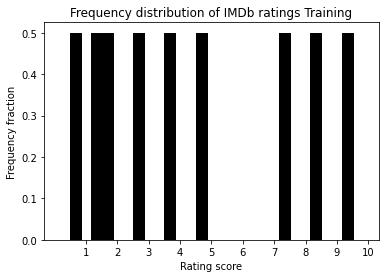

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train,density=True,rwidth=0.7)
plt.ylabel("Frequency fraction")
plt.xlabel("Rating score")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Frequency distribution of IMDb ratings Training")

Text(0.5, 1.0, 'Frequency distribution of IMDb ratings Testing')

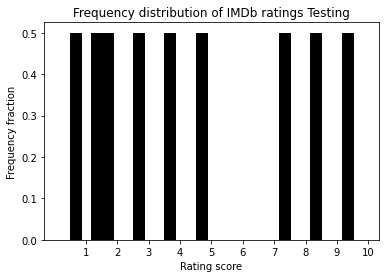

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test,density=True,rwidth=0.7)
plt.ylabel("Frequency fraction")
plt.xlabel("Rating score")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Frequency distribution of IMDb ratings Testing")

In [ ]:
df_count_train = x_train.astype(bool).sum(axis=0)
df_count_test=x_test.astype(bool).sum(axis=0)


In [ ]:
df_count_train.items
df_count_test.items

<bound method Series.items of 0        24767
1        24135
2        24151
3        23699
4        23497
         ...  
89518        0
89519        0
89520        0
89521        0
89522        1
Length: 89523, dtype: int64>

In [ ]:
new_df_train = df_count_train.le(12500) & df_count_train.ge(250)
new_df_train.value_counts()

False    87783
True      1744
dtype: int64

In [ ]:
new_df_test = df_count_test.le(12500) & df_count_test.ge(250)
new_df_test.value_counts()

False    87802
True      1721
dtype: int64

filter out less than 1%(250), and greater than 50%(12500),sub_x_train is the filtered features

In [ ]:
sub_x_train =  x_train.loc[:,new_df_train]
sub_x_train
sub_x_test= x_test.loc[:,new_df_test]
sub_x_test

,21,23,27,30,31,32,33,34,35,36,...,2068,2079,2080,2109,2154,2166,2184,2212,2214,2344
0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4.0,3.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,3.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Then we do absolute z-score
we should standardize the matrix first

In [ ]:
a=list(sub_x_train.columns)
np_x = sub_x_train.to_numpy()
np_x
b=list(sub_x_test.columns)
np_x2 = sub_x_test.to_numpy()

In [ ]:
np_x.shape
np_x2.shape

(25000, 1721)

In [ ]:
np_xT=np_x.T
np_xT
np_xT2=np_x2.T
np_xT2


array([[ 1.,  1.,  4., ...,  0.,  2.,  1.],
       [ 0.,  0.,  3., ...,  3.,  0.,  1.],
       [ 0.,  1.,  1., ...,  0.,  2.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
np_xT.shape
np_xT2.shape

(1721, 25000)

In [ ]:
z_score1 = np.zeros(1744)
z_score2=np.zeros(1721)

In [ ]:
#y standardize
y_train_std = (y_train - np.mean(y_train)) / np.std(y_train)
y_train_std
y_test_std = (y_test - np.mean(y_test)) / np.std(y_test)




In [ ]:
np.cov(y_train_std.T).shape

()

In [ ]:
from numpy.ma.core import sqrt
for i in range(0,1744):
  x_train1 = np_xT[i]
  #standardize the matrix x
  x_train_std = (x_train1 - np.mean(x_train1)) / np.std(x_train1)
  #print(x.shape)
  #check the standardization
  #print(np.matmul(x,x.T))
  score_train = np.matmul(x_train_std,y_train_std)/sqrt(25000)
  z_score1[i]= score_train
  print(score_train)

0    6.256605
dtype: float64
0    13.724656
dtype: float64
0   -1.046823
dtype: float64
0    6.920921
dtype: float64
0    5.123401
dtype: float64
0    5.898268
dtype: float64
0   -11.986905
dtype: float64
0    5.367678
dtype: float64
0   -10.715582
dtype: float64
0   -12.010625
dtype: float64
0   -13.866341
dtype: float64
0    7.484908
dtype: float64
0   -13.288732
dtype: float64
0   -18.750689
dtype: float64
0   -4.211767
dtype: float64
0   -14.003543
dtype: float64
0    9.198554
dtype: float64
0   -5.227786
dtype: float64
0   -4.321144
dtype: float64
0   -27.427788
dtype: float64
0   -5.86804
dtype: float64
0    0.145268
dtype: float64
0    5.308264
dtype: float64
0    5.789493
dtype: float64
0    4.691776
dtype: float64
0    15.430633
dtype: float64
0   -21.240748
dtype: float64
0    3.492248
dtype: float64
0   -24.636393
dtype: float64
0   -4.339927
dtype: float64
0    1.636574
dtype: float64
0   -11.484295
dtype: float64
0    3.55452
dtype: float64
0   -12.836369
dtype: float64
0 

In [ ]:
from numpy.ma.core import sqrt
for i in range(0,1721):
  x_test1 = np_xT2[i]
  #standardize the matrix x
  x_test_std = (x_test1 - np.mean(x_test1)) / np.std(x_test1)
  #print(x.shape)
  #check the standardization
  #print(np.matmul(x,x.T))
  score_test = np.matmul(x_test_std,y_test_std)/sqrt(25000)
  z_score2[i]= score_test
  print(score_test)

0    5.388379
dtype: float64
0    13.424176
dtype: float64
0   -3.044732
dtype: float64
0    7.358501
dtype: float64
0    4.555359
dtype: float64
0    6.170052
dtype: float64
0   -12.734678
dtype: float64
0    1.140937
dtype: float64
0   -11.1752
dtype: float64
0   -14.090345
dtype: float64
0   -12.45857
dtype: float64
0    5.378783
dtype: float64
0   -12.961864
dtype: float64
0   -19.41092
dtype: float64
0   -4.59317
dtype: float64
0   -15.466077
dtype: float64
0    7.967307
dtype: float64
0   -5.570971
dtype: float64
0   -5.975564
dtype: float64
0   -27.851956
dtype: float64
0   -8.308241
dtype: float64
0   -1.501708
dtype: float64
0    4.267349
dtype: float64
0    2.492559
dtype: float64
0    1.999182
dtype: float64
0    13.997845
dtype: float64
0   -22.922597
dtype: float64
0    3.44214
dtype: float64
0   -22.457608
dtype: float64
0   -4.905626
dtype: float64
0    0.310692
dtype: float64
0   -12.711075
dtype: float64
0    2.376621
dtype: float64
0   -14.405823
dtype: float64
0    9

(array([ 0.00015279,  0.00015279,  0.00084033,  0.00297935,  0.01550791,
         0.06355952,  0.04415553,  0.00496559,  0.00061115,  0.00030557]),
 array([-42.9950395 , -35.48925223, -27.98346495, -20.47767768,
        -12.97189041,  -5.46610314,   2.03968413,   9.5454714 ,
         17.05125867,  24.55704594,  32.06283322]),
 <a list of 10 Patch objects>)

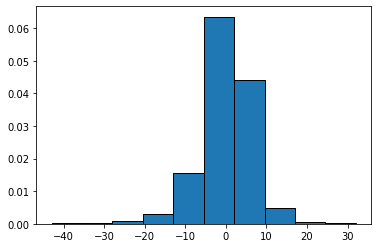

In [ ]:
import matplotlib.pyplot as plt
plt.hist(z_score1,density=True)
#plt.hist(z_score2,density=True)

In [ ]:
idx_train = np.argsort(z_score1)
idx_test = np.argsort(z_score2)

This function returns the list of word index

In [ ]:
#pos means get postive z-score index
def get_top_n(n,z_score,pos=True):
  if pos:
    #top_n_idx is the index in a
    top_n_idx = np.argsort(z_score)[-n:]
    c = [a[index] for index in top_n_idx]
  else:
    top_n_idx = np.argsort(z_score)[:n]
    c = [a[index] for index in top_n_idx]
  return c


In [ ]:
#test top10 of pos/neg z-score idx
#pos
get_top_n(10,z_score1)
#neg
get_top_n(10,z_score1,pos=False)

[77, 240, 427, 368, 46, 373, 422, 55, 503, 363]

In [ ]:
pos_words = ["beautiful", "favorite","perfect","loved","amazing","love","best","excellent","wonderful","great"]
neg_words = ["bad","worst","waste","awful","?","terrible","worse","no","horrible","stupid"]
print(len(pos_words))
print(len(neg_words))

In [ ]:
#merge list
neg_words.reverse()
words_total = pos_words+neg_words
sorted_z_score = sorted(z_score)
score_total = sorted_z_score[:10]+sorted_z_score[-10:]
score_total.sort(reverse=True)
score_total

In [ ]:
color_list =[]
for i in score_total:
  if i<0:
    color_list.append("red")
  else:
    color_list.append("blue")

In [ ]:
plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=words_total, xmin=0, xmax=score_total,
           color=color_list, alpha=0.7, linewidth=8)
plt.xlabel("z-score",fontdict={'size':15})
plt.ylabel("features/words",fontdict={'size':15})
plt.title('top 20 features on IMDB', fontdict={
          'size': 20})

In [ ]:
#make the z-score list all absolute value
abs_score =  [abs(ele) for ele in z_score1]

In [ ]:
import matplotlib.pyplot as plt
plt.hist(abs_score,density=True)
import statistics

statistics.median(abs_score)
test = [score for score in abs_score if score>3.090]
len(test)

In [ ]:
#top10
get_top_n(10,abs_score)


[422, 309, 369, 373, 46, 368, 83, 427, 240, 77]

In [ ]:
#top100
top100=get_top_n(100,abs_score)
#top300
top300=get_top_n(300,abs_score)
#top500
top500=get_top_n(500,abs_score)
#top800
top800=get_top_n(800,abs_score)
#top1000
top1000=get_top_n(1000,abs_score)

selecting features



In [ ]:
#change y label to binary
y_train.loc[y_train[0] <= 4,'result'] = 0
y_train.loc[y_train[0] >= 4, 'result'] = 1
y_train_bi=y_train['result']


In [ ]:
y_test.loc[y_test[0] <= 4,'result'] = 0
y_test.loc[y_test[0] >= 4, 'result'] = 1
y_test_bi=y_test['result']


In [ ]:

sel_x_train= sub_x_train[sub_x_train.columns.intersection(top100)]
sel_x_test= x_test[x_test.columns.intersection(top100)]


In [ ]:
#filtering out top300 dataset
top300_x_train= sub_x_train[sub_x_train.columns.intersection(top300)]
top300_x_test= x_test[x_test.columns.intersection(top300)]

In [ ]:
#filtering out top500 dataset
top500_x_train= sub_x_train[sub_x_train.columns.intersection(top500)]
top500_x_test= x_test[x_test.columns.intersection(top500)]


In [ ]:
#filtering out top800 dataset
top800_x_train= sub_x_train[sub_x_train.columns.intersection(top800)]
top800_x_test= x_test[x_test.columns.intersection(top800)]


In [ ]:
#filtering out top1000 dataset
top1000_x_train= sub_x_train[sub_x_train.columns.intersection(top1000)]
top1000_x_test= x_test[x_test.columns.intersection(top1000)]


Task 2: Implement Logistic classifiers

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function 

In [ ]:
class LogisticRegression:
     
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4,max_iters =1e4,verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
    
    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad    
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
          
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh
    
       

#LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

**linear regression for imbd dataset**

In [ ]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(sel_x_train,Y_train)
y_test_pred = lin.predict(sel_x_test)
lin.score(sel_x_test, Y_test)

0.42529969521432121

(array([ 5022.,  2302.,  2541.,  2635.,     0.,     0.,  2307.,  2850.,
         2344.,  4999.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

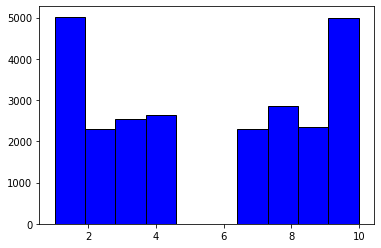

In [ ]:
plt.hist(Y_test, color = 'blue', edgecolor = 'black',
         bins = int(10))

(array([  1.10000000e+01,   2.80000000e+01,   1.95000000e+02,
          1.69600000e+03,   1.00730000e+04,   1.20050000e+04,
          9.02000000e+02,   8.00000000e+01,   8.00000000e+00,
          2.00000000e+00]),
 array([-11.00600581,  -7.68189159,  -4.35777737,  -1.03366314,
          2.29045108,   5.6145653 ,   8.93867953,  12.26279375,
         15.58690797,  18.91102219,  22.23513642]),
 <a list of 10 Patch objects>)

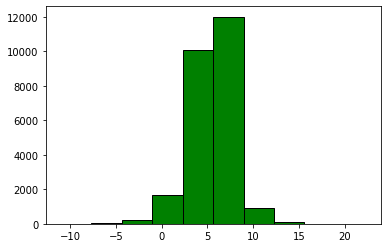

In [ ]:
plt.hist(y_test_pred, color = 'green', edgecolor = 'black',
         bins = int(10))

**classfication** **accuracy**

In [ ]:
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

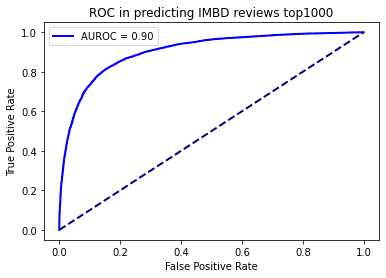

In [ ]:

#top1000
logitreg=sk_LogisticRegression(max_iter=1e4)
logitreg.fit(top1000_x_train,y_train_bi)

y_test_prob = logitreg.predict_proba(top1000_x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc1000 = roc_auc_score(y_test_bi, y_test_prob)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc1000)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#plt.xline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting IMBD reviews top1000')
plt.legend(loc="best")

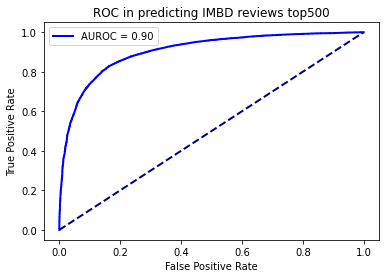

In [ ]:
#top500
logitreg=sk_LogisticRegression(max_iter=1e4)
logitreg.fit(top500_x_train,y_train_bi)

y_test_prob = logitreg.predict_proba(top500_x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc500 = roc_auc_score(y_test_bi, y_test_prob)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc500)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting IMBD reviews top500')
plt.legend(loc="best")

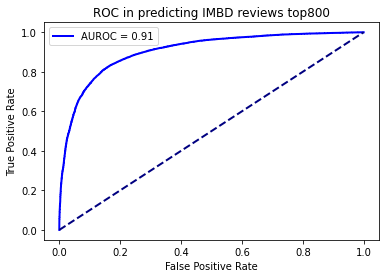

In [ ]:
#top800
logitreg=sk_LogisticRegression(max_iter=1e4)
logitreg.fit(top800_x_train,y_train_bi)
y_test_prob = logitreg.predict_proba(top800_x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc800 = roc_auc_score(y_test_bi, y_test_prob)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc800)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting IMBD reviews top800')
plt.legend(loc="best")

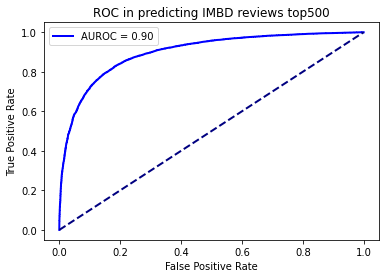

In [ ]:
#top300

logitreg=sk_LogisticRegression(max_iter=1e4)
logitreg.fit(top300_x_train,y_train_bi)

y_test_prob = logitreg.predict_proba(top300_x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc300 = roc_auc_score(y_test_bi, y_test_prob)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc300)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting IMBD reviews top500')
plt.legend(loc="best")

**evaluate the model by ROC and** **AUROC**

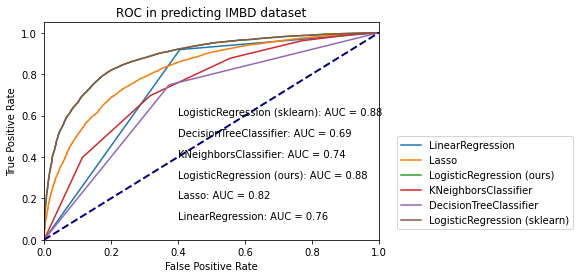

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(),
          sk_LogisticRegression()]
perf = {}
lin = LinearRegression()
# train the model on the training set
lin.fit(sel_x_train,y_train_bi)
y_test_pred = lin.predict(sel_x_test)
y_test_prob = (y_test_pred > 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc = roc_auc_score(y_test_bi, y_test_prob)
perf["LinearRegression"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

lasso = Lasso(alpha=0.1)
lasso.fit(sel_x_train, Y_train) 
pred_test_lasso= lasso.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, pred_test_lasso)
auroc = roc_auc_score(y_test_bi, pred_test_lasso)
perf["Lasso"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

#ridge

X, y = sel_x_train,y_train_bi
clf = RidgeClassifier().fit(X, y)
y_pred=clf.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_pred)
auroc_ridge = roc_auc_score(y_test_bi, y_pred)
perf["Ridge"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc_ridge}

#perf = {}
# our implementation is slow you may try sklearn version
log = LogisticRegression(max_iters =1e4)
log.fit(sel_x_train,y_train_bi)
y_test_prob = log.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
auroc = roc_auc_score(y_test_bi, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(sel_x_train, y_train_bi)
    y_test_prob = fit.predict_proba(sel_x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test_bi, y_test_prob)
    auroc = roc_auc_score(y_test_bi, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}


plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting IMBD dataset')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")


In [ ]:
#from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
logis = sk_LogisticRegression()
logis.fit(sel_x_train,y_train_bi)
coef = logis.coef_
#print(coef)
co=coef.tolist()
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices,ary.shape)
largest_indices(coef, 10)
def get_indices_of_k_smallest(arr, k):
    idx = np.argpartition(arr.ravel(), k)
    return tuple(np.array(np.unravel_index(idx, arr.shape))[:, range(min(k, 0), max(k, 0))])
    
get_indices_of_k_smallest(coef, 10)
largest_indices(coef, 10)

s=[90, 75, 97, 47, 55, 62, 37, 78, 87, 88]
l=[98, 42, 80, 83, 92, 74, 61, 95, 51, 48]
top100=get_top_n(100,abs_score)

#smallest:422(worse),407(supposed),427(waste),1270(laughable),1014(wasted),88(don't),409(couldn't),459(amazing),503(horrible),55(no)
#largest:240(worst),489(today),114(love),53(even),369(wonderful),437(loved),221(script),368(awful),1197(garbage),897(badly)
#for i in s:
  #print(top100[i])

#for j in l:
  #print(top100[j])
large_co=coe[largest_indices(coe, 10)]
small_co=coe[get_indices_of_k_smallest(coe, 10)]
small_co

array([-1.14593984, -1.05429525, -1.32100071, -0.98106126, -1.21719553,
       -0.79483434, -1.19288132, -0.91497496, -0.83521625, -0.8297971 ])

In [ ]:
large_words = ["worst","today","love","even","wonderful","loved","script","awful","garbage","badly"]
small_words = ["worse","supposed","waste","laughable","wasted","don't","couldn't","amazing","horrible","no"]

In [ ]:
#merge list
#small_words.reverse()
words_total = large_words+small_words

score_total= [*large_co, *small_co]

words_total
score_total

[1.1522740986185602,
 0.95181558534397726,
 0.93223845631177826,
 0.82949868773147162,
 0.78042416620589317,
 0.71768075599028136,
 0.71314294611561491,
 0.70174415949534985,
 0.66892317006971358,
 0.65668928011624539,
 -1.1459398391322684,
 -1.0542952497536913,
 -1.3210007059599709,
 -0.98106125740329309,
 -1.2171955318773271,
 -0.79483434344567749,
 -1.1928813184407414,
 -0.9149749638751028,
 -0.83521624518734316,
 -0.82979710197486156]

In [ ]:
color_list =[]
for i in score_total:
  if i<0:
    color_list.append("red")
  else:
    color_list.append("blue")

Text(0.5, 1.0, 'top 20 features on IMDB')

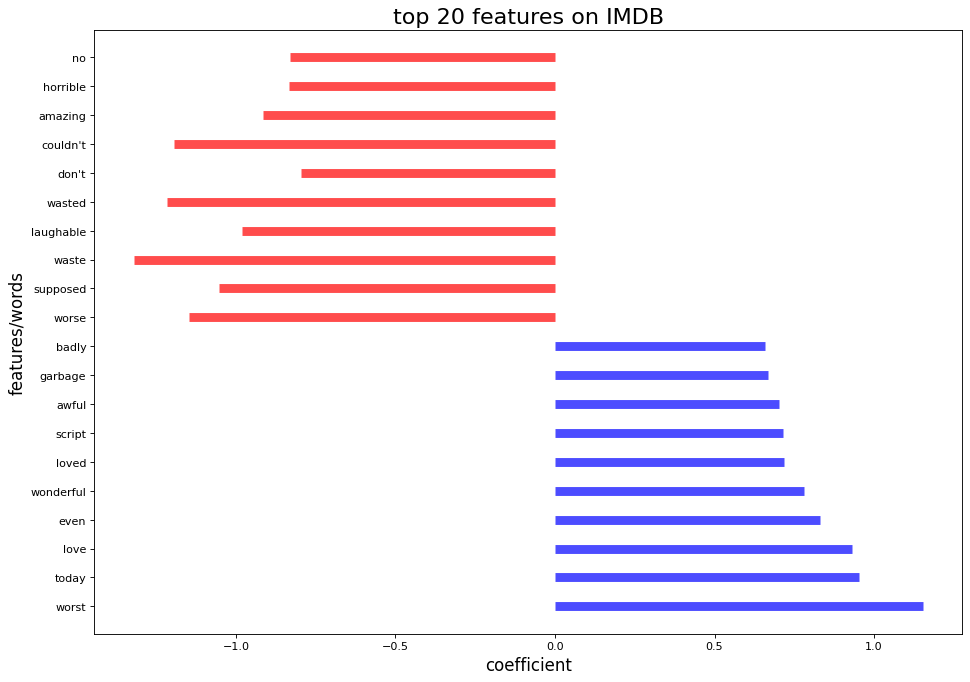

In [ ]:
plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=words_total, xmin=0, xmax=score_total,
           color=color_list, alpha=0.7, linewidth=8)
plt.xlabel("coefficient",fontdict={'size':15})
plt.ylabel("features/words",fontdict={'size':15})
plt.title('top 20 features on IMDB', fontdict={
          'size': 20})

**Compare** **the accuracy as a function of dataset size** 

In [ ]:
def evaluate(y, y_pred):
    
    accuracy = sum(y_pred==y)/len(y)
    return accuracy

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
#randomly select 20%,40%, 60% and 80% of the available training data and train your model on this subset and evaluate the trained model on the test set
size=[0.8,0.6,0.4,0.2,1]
train_size=[]
test_auroc=[]
test_auroc_knn=[]
for size in size:
   x_train1, x_valid,y_train1,y_valid= model_selection.train_test_split(sel_x_train, y_train_bi, test_size = size, random_state=1, shuffle=True)
   train_size.append(x_train1.shape[0])
   logitreg = LogisticRegression(max_iters=1e4)
   logitreg.fit(x_train1,y_train1)
   y_test_pred = logitreg.predict(sel_x_test)
   fpr, tpr, _ = roc_curve(y_test_bi, y_test_pred)
   auroc = roc_auc_score(y_test_bi, y_test_pred)
   test_auroc.append(auroc)

   knn = KNeighborsClassifier()
   knn.fit(x_train1,y_train1)
   y_pred_knn=knn.predict(sel_x_test)
   fpr, tpr, _ = roc_curve(y_test_bi, y_pred_knn)
   auroc_knn = roc_auc_score(y_test_bi, y_pred_knn)
   test_auroc_knn.append(auroc_knn)

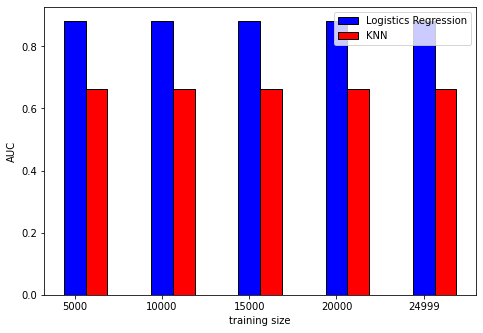

[0.87736137894613286,
 0.88176275323072251,
 0.88236239782153225,
 0.88293229828318243,
 0.88320402741268766]

In [ ]:
fig = plt.figure()
X = np.arange(5)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00,auroc,color = 'b', width = 0.25,label='Logistics Regression')
ax.bar(X + 0.25,auroc_knn,color = 'r', width = 0.25, label='KNN')
plt.xticks(X,train_size)
plt.xlabel("training size")
plt.ylabel("AUC")
plt.legend()
plt.show()
test_auroc
#test_auroc_knn

**try different stopping criteria**


In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function 
class logistic_regression:
     
    def __init__(self, add_bias=False, learning_rate=.1, epsilon=1e-4,max_iters =1000,verbose=False):
        np.random.seed(551)
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.w=np.zeros(100)

    def gradient(self, x, y):
        N,D = x.shape
        #yh = logistic(np.dot(x,self.w))    # predictions  size N
        #grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        grad=np.dot(x.T,self.predict(x)-y)/N
        return grad
    
    def cost_fn(self,x, y):
        N, D = x.shape
        
        z = np.dot(x, self.w)
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
        return J
        
    def fit(self, x, y,X_valid=None, y_valid=None,niter=1000):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            loss_train = self.cost_fn(x, y)
            losses_train[t] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.cost_fn(X_valid, y_valid)
                losses_valid[t] = loss_valid
                print(f"iter {t}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {t}: {loss_train:.3f}") 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return losses_train,losses_valid
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
          
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh
    def check_grad(self,x,y):
        #verify gradient calculation :small perturbation
        x = sel_x_train.to_numpy()
        y = y_train_bi.to_numpy()
        y = np.expand_dims(y, axis=-1)
        # small perturbation
        w = self.w
        w0 = w
        epsilon = np.random.randn(1)[0] * 1e-5
        w1 = w0 + epsilon
        w2 = w0 - epsilon
        a1 = w1*x
        a2 = w2*x
        ce1 = np.sum(y * np.log1p(np.exp(-a1)) + (1-y) * np.log1p(np.exp(a1)))
        ce2 = np.sum(y * np.log1p(np.exp(-a2)) + (1-y) * np.log1p(np.exp(a2)))
        dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient

        yh = 1/(1+np.exp(-x * w))
        dw_cal = np.sum((yh - y) * x) # hand calculated gradient

        print(dw_cal)
        print(dw_num)
        print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)

    def check_grad_2(self,x,y):
        lr = 0.5
        niter = 500
        ce_all = np.zeros(niter)
        #w=self.w
        w0 = self.w
        for i in range(niter):
            #a = w * x
            ce_all[i] = self.cost_fn(x,y)
            #y_hat = 1 / (1 + np.exp(-a))
            #dw = np.sum((y_hat - y) * x)
            dw=self.gradient(x,y)
            #w = w - lr * dw
            self.w=self.w-lr*dw
        plt.clf()
        plt.figure(figsize=((16/9)*3.6,3.6))
        plt.plot(ce_all)
        plt.ylabel("Cross entropy")
        plt.xlabel("iteration")
        # plt.title(f"True w={w_true}; Estimated w={round(w.astype(float)[0],2)}")
        plt.title(f"Estimated w={round(self.w.astype(float)[0],2)}")
        plt.show()

#LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [ ]:
#separate the validation datasets
from sklearn import model_selection
n_x_train, n_x_valid, n_y_train, n_y_valid = model_selection.train_test_split(sel_x_train, y_train_bi, test_size = 0.5, random_state=1, shuffle=True)
n_x_train=np.array(n_x_train, dtype=np.float128)

check gradient

In [ ]:
# check grad
logistic_regression=logistic_regression()
print(logistic_regression.check_grad(sel_x_train, y_train_bi))

-25969.0
-25969.0000254
2.39124173593e-19
None


<Figure size 432x288 with 0 Axes>

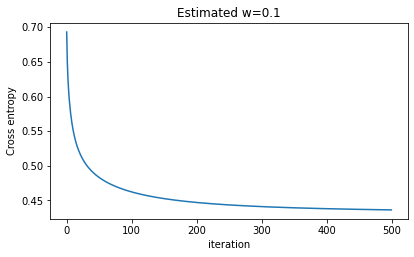

In [ ]:
#Check the gradient by monitoring loss at each iteration
#logistic_regression=logistic_regression()
logistic_regression.check_grad_2(sel_x_train, y_train_bi)

convergence plot

In [ ]:
#evaluate the model 
logi=logistic_regression()
ce_train,ce_valid=logi.fit(n_x_train,n_y_train,n_x_valid,n_y_valid)
y_pred=logi.predict(sel_x_test)



iter 0: 0.681; 0.681
iter 1: 0.671; 0.671
iter 2: 0.664; 0.663
iter 3: 0.657; 0.657
iter 4: 0.651; 0.651
iter 5: 0.645; 0.645
iter 6: 0.640; 0.640
iter 7: 0.636; 0.636
iter 8: 0.631; 0.632
iter 9: 0.627; 0.628
iter 10: 0.624; 0.624
iter 11: 0.620; 0.621
iter 12: 0.617; 0.617
iter 13: 0.613; 0.614
iter 14: 0.610; 0.611
iter 15: 0.607; 0.609
iter 16: 0.604; 0.606
iter 17: 0.602; 0.603
iter 18: 0.599; 0.601
iter 19: 0.597; 0.598
iter 20: 0.594; 0.596
iter 21: 0.592; 0.594
iter 22: 0.590; 0.592
iter 23: 0.588; 0.590
iter 24: 0.586; 0.588
iter 25: 0.584; 0.586
iter 26: 0.582; 0.584
iter 27: 0.580; 0.582
iter 28: 0.578; 0.581
iter 29: 0.577; 0.579
iter 30: 0.575; 0.577
iter 31: 0.573; 0.576
iter 32: 0.572; 0.574
iter 33: 0.570; 0.573
iter 34: 0.569; 0.571
iter 35: 0.567; 0.570
iter 36: 0.566; 0.569
iter 37: 0.565; 0.567
iter 38: 0.563; 0.566
iter 39: 0.562; 0.565
iter 40: 0.561; 0.564
iter 41: 0.559; 0.562
iter 42: 0.558; 0.561
iter 43: 0.557; 0.560
iter 44: 0.556; 0.559
iter 45: 0.555; 0.55

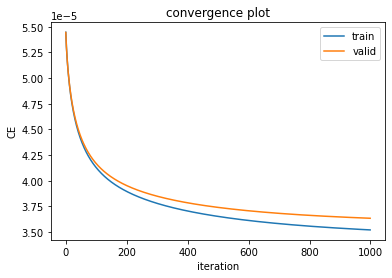

0.86841621888892861

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(ce_train/n_x_train.shape[0],label='train')
plt.plot(ce_valid/n_x_valid.shape[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("convergence plot")
plt.legend()
plt.show()
fpr, tpr, _ = roc_curve(y_test_bi, y_pred)
auroc = roc_auc_score(y_test_bi, y_pred)
auroc

**Try different learning rates**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
large_alpha = 0.1

model = LogisticRegression(learning_rate=large_alpha,max_iters=1e4)
model.fit(sel_x_train,y_train_bi)
y_train_pred=model.predict(sel_x_train)
y_test_pred=model.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_pred)
auroc_large = roc_auc_score(y_test_bi, y_test_pred)
print(f"acuroc socre for large learning rate: {auroc_large:.3f}")

acuroc socre for large learning rate: 0.883


In [ ]:
larger_alpha = 0.5

model = LogisticRegression(learning_rate=larger_alpha,max_iters=1e4)
model.fit(sel_x_train,y_train_bi)
t_train_pred=model.predict(sel_x_train)
y_test_pred=model.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_pred)
auroc_larger = roc_auc_score(y_test_bi, y_test_pred)
print(f"acuroc socre for larger learning rate: {auroc_larger:.3f}")


acuroc socre for larger learning rate: 0.883


In [ ]:
small_alpha = 0.01

model = LogisticRegression(learning_rate=large_alpha,max_iters=1e4)
model.fit(sel_x_train,y_train_bi)
y_train_pred=model.predict(sel_x_train)
y_test_pred=model.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_pred)
auroc_small = roc_auc_score(y_test_bi, y_test_pred)
print(f"acuroc socre for small learning rate: {auroc_small:.3f}")

acuroc socre for small learning rate: 0.883


In [ ]:
smaller_alpha = 0.001

model = LogisticRegression(learning_rate=smaller_alpha,max_iters=1e4)
#model = LogisticRegression(learning_rate=smaller_alpha,max_iters=1e5)
model.fit(sel_x_train,y_train_bi)
y_test_pred=model.predict(sel_x_test)
fpr, tpr, _ = roc_curve(y_test_bi, y_test_pred)
auroc_smaller = roc_auc_score(y_test_bi, y_test_pred)
print(f"acuroc socre for smaller learning rate: {auroc_smaller:.3f}")




acuroc socre for smaller learning rate: 0.841


**stop when gradient is smaller than certain threshold**

In [ ]:
class logistic_with_check_grad(logistic_regression):
    def fit(self, x, y, x_valid=None, y_valid=None, lr=0.1, niter=10000,epsilon=1e-4):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        g = np.inf
        for i in range(niter):
          #print(g)
          if np.linalg.norm(g) > epsilon:
            print(np.linalg.norm(g))
            g = self.gradient(x, y)
            self.w = self.w - lr * g
            loss_train = self.cost_fn(x, y)
            losses_train[i] = loss_train
            if x_valid is not None and y_valid is not None:
                loss_valid = self.cost_fn(x_valid, y_valid)
                losses_valid[i] = loss_valid
                #print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                z=0
                #print(f"iter {i}: {loss_train:.3f}")
          else:#stop if it is smaller than 10^-2
               losses_train.resize((1,i))
               losses_valid.resize((1,i))
               print(f"Gradient smaller than the threshold at iteration {i}") 
               break    

        return losses_train, losses_valid,i

    def gradient(self, x, y):
        return super().gradient(x,y)  

In [ ]:
lr_grad = logistic_with_check_grad(epsilon=0.01)
grad_train0,grad_valid00,stop_lr0=lr_grad.fit(n_x_train,n_y_train,n_x_valid,n_y_valid,epsilon=0.01)
y_pred=lr_grad.predict(sel_x_test)
#grad_acc=evaluate(y_test_bi,y_pred)
fpr, tpr, _ = roc_curve(y_test_bi, y_pred)
auroc_grad1 = roc_auc_score(y_test_bi, y_pred)
auroc_grad1

inf
0.364150140464
0.316508035965
0.285191299405
0.263780027394
0.248144720697
0.235942391015
0.225885883522
0.217261153444
0.209658877621
0.202832905386
0.196626430773
0.190933209726
0.185676840607
0.180799431032
0.17625521175
0.17200680528
0.168022950395
0.164277046065
0.160746171392
0.157410392544
0.154252250305
0.151256366667
0.148409133622
0.145698461258
0.143113570301
0.140644819042
0.138283557523
0.136022003769
0.133853138091
0.131770612373
0.129768671899
0.127842087719
0.12598609795
0.12419635667
0.122468889293
0.120800053495
0.119186504914
0.117625166968
0.116113204227
0.114647998868
0.113227129819
0.111848354226
0.110509590972
0.109208905974
0.107944499053
0.106714692177
0.105517918921
0.104352714996
0.103217709732
0.102111618399
0.101033235267
0.0999814273448
0.0989551286963
0.0979533352944
0.0969751003426
0.0960195300206
0.0950857796098
0.094173049958
0.0932805842522
0.0924076650666
0.091553611659
0.0907177774939
0.0898995479669
0.0890983383152
0.088313591694
0.087544777404

0.8709171368814308

In [ ]:
lr_grad = logistic_with_check_grad(epsilon=0.02)
grad_train3,grad_valid4,stop_lr2=lr_grad.fit(n_x_train,n_y_train,n_x_valid,n_y_valid,epsilon=0.02)
y_pred=lr_grad.predict(sel_x_test)
#grad_acc=evaluate(y_test_bi,y_pred)
fpr, tpr, _ = roc_curve(y_test_bi, y_pred)
auroc_grad2 = roc_auc_score(y_test_bi, y_pred)
auroc_grad2

inf
0.364150140464
0.316508035965
0.285191299405
0.263780027394
0.248144720697
0.235942391015
0.225885883522
0.217261153444
0.209658877621
0.202832905386
0.196626430773
0.190933209726
0.185676840607
0.180799431032
0.17625521175
0.17200680528
0.168022950395
0.164277046065
0.160746171392
0.157410392544
0.154252250305
0.151256366667
0.148409133622
0.145698461258
0.143113570301
0.140644819042
0.138283557523
0.136022003769
0.133853138091
0.131770612373
0.129768671899
0.127842087719
0.12598609795
0.12419635667
0.122468889293
0.120800053495
0.119186504914
0.117625166968
0.116113204227
0.114647998868
0.113227129819
0.111848354226
0.110509590972
0.109208905974
0.107944499053
0.106714692177
0.105517918921
0.104352714996
0.103217709732
0.102111618399
0.101033235267
0.0999814273448
0.0989551286963
0.0979533352944
0.0969751003426
0.0960195300206
0.0950857796098
0.094173049958
0.0932805842522
0.0924076650666
0.091553611659
0.0907177774939
0.0898995479669
0.0890983383152
0.088313591694
0.087544777404

0.86375209028525324

In [ ]:
x_axis2=[]
for j in range(stop_lr2):
     x_axis2.append(j)
     j=j+1

In [ ]:
x_axis1=[]
for j in range(stop_lr0):
     x_axis1.append(j)
     j=j+1


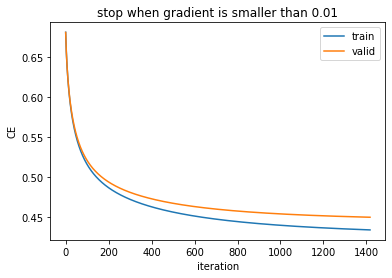

In [ ]:
grad_train0=list(grad_train0)
    
grad_train3=list(grad_train3) 
plt.clf()
plt.plot(x_axis1,grad_train0[0],label='train')
plt.plot(x_axis1,grad_valid00[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title('stop when gradient is smaller than 0.01')
plt.legend()
plt.show()

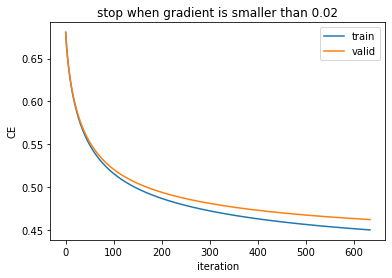

In [ ]:
grad_train3=list(grad_train3)
    
grad_valid4=list(grad_valid4) 
plt.clf()
plt.plot(x_axis2,grad_train3[0],label='train')
plt.plot(x_axis2,grad_valid4[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title('stop when gradient is smaller than 0.02')
plt.legend()
plt.show()

**Stop if there is small change in cost** **function**

In [ ]:
class logistic_with_grad_diff(logistic_regression):
    def fit(self, x, y, X_valid=None, y_valid=None, lr=0.5, niter=1000,e=1e-4):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
             self.w=self.w - lr * self.gradient(x, y)
             loss_train = self.cost_fn(x, y)
             #print(losses_train[i-1]-loss_train)
             if abs(losses_train[i-1]-loss_train)>e:
                 losses_train[i] = loss_train
                 if X_valid is not None and y_valid is not None:
                    loss_valid = self.cost_fn(X_valid, y_valid)
                    losses_valid[i] = loss_valid
                    print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
                 else:
                    print(f"iter {i}: {loss_train:.3f}")
             else:
                  losses_train.resize((1,i))
                  losses_valid.resize((1,i))
                  print(f"Small change in cost function at iteration {i}")
                  break

        return losses_train, losses_valid,i
    def gradient(self, x, y):
        return super().gradient(x,y)

In [ ]:
model1=logistic_with_grad_diff(epsilon=1e-5)
c5_train,c6_train,stop2=model1.fit(n_x_train,n_y_train,n_x_valid,n_y_valid,niter=2000,e=1e-5)
y_pred_2=model1.predict(sel_x_test)
#m3_accu=evaluate(y_test_bi,y_pred_1)
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_2)
auroc_grad2 = roc_auc_score(y_test_bi, y_pred_2)
auroc_grad2

iter 0: 0.648; 0.648
iter 1: 0.624; 0.625
iter 2: 0.607; 0.609
iter 3: 0.594; 0.596
iter 4: 0.584; 0.586
iter 5: 0.575; 0.577
iter 6: 0.567; 0.570
iter 7: 0.560; 0.563
iter 8: 0.554; 0.557
iter 9: 0.549; 0.552
iter 10: 0.544; 0.548
iter 11: 0.540; 0.544
iter 12: 0.536; 0.540
iter 13: 0.532; 0.536
iter 14: 0.529; 0.533
iter 15: 0.526; 0.530
iter 16: 0.523; 0.528
iter 17: 0.520; 0.525
iter 18: 0.518; 0.523
iter 19: 0.516; 0.520
iter 20: 0.513; 0.518
iter 21: 0.511; 0.516
iter 22: 0.509; 0.515
iter 23: 0.507; 0.513
iter 24: 0.506; 0.511
iter 25: 0.504; 0.510
iter 26: 0.502; 0.508
iter 27: 0.501; 0.507
iter 28: 0.499; 0.505
iter 29: 0.498; 0.504
iter 30: 0.497; 0.503
iter 31: 0.495; 0.502
iter 32: 0.494; 0.501
iter 33: 0.493; 0.500
iter 34: 0.492; 0.499
iter 35: 0.491; 0.498
iter 36: 0.490; 0.497
iter 37: 0.489; 0.496
iter 38: 0.488; 0.495
iter 39: 0.487; 0.494
iter 40: 0.486; 0.493
iter 41: 0.485; 0.492
iter 42: 0.484; 0.491
iter 43: 0.483; 0.491
iter 44: 0.482; 0.490
iter 45: 0.482; 0.48

0.87385544962711825

In [ ]:
model1=logistic_with_grad_diff()
c3_train,c4_train,stop=model1.fit(n_x_train,n_y_train,n_x_valid,n_y_valid,niter=1000)
y_pred_1=model1.predict(sel_x_test)
#m3_accu=evaluate(y_test_bi,y_pred_1)
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_1)
auroc_grad1 = roc_auc_score(y_test_bi, y_pred_1)
auroc_grad1

iter 0: 0.648; 0.648
iter 1: 0.624; 0.625
iter 2: 0.607; 0.609
iter 3: 0.594; 0.596
iter 4: 0.584; 0.586
iter 5: 0.575; 0.577
iter 6: 0.567; 0.570
iter 7: 0.560; 0.563
iter 8: 0.554; 0.557
iter 9: 0.549; 0.552
iter 10: 0.544; 0.548
iter 11: 0.540; 0.544
iter 12: 0.536; 0.540
iter 13: 0.532; 0.536
iter 14: 0.529; 0.533
iter 15: 0.526; 0.530
iter 16: 0.523; 0.528
iter 17: 0.520; 0.525
iter 18: 0.518; 0.523
iter 19: 0.516; 0.520
iter 20: 0.513; 0.518
iter 21: 0.511; 0.516
iter 22: 0.509; 0.515
iter 23: 0.507; 0.513
iter 24: 0.506; 0.511
iter 25: 0.504; 0.510
iter 26: 0.502; 0.508
iter 27: 0.501; 0.507
iter 28: 0.499; 0.505
iter 29: 0.498; 0.504
iter 30: 0.497; 0.503
iter 31: 0.495; 0.502
iter 32: 0.494; 0.501
iter 33: 0.493; 0.500
iter 34: 0.492; 0.499
iter 35: 0.491; 0.498
iter 36: 0.490; 0.497
iter 37: 0.489; 0.496
iter 38: 0.488; 0.495
iter 39: 0.487; 0.494
iter 40: 0.486; 0.493
iter 41: 0.485; 0.492
iter 42: 0.484; 0.491
iter 43: 0.483; 0.491
iter 44: 0.482; 0.490
iter 45: 0.482; 0.48

0.86821584619987946

In [ ]:
x_axis=[]
for i in range(stop):
     x_axis.append(i)
     i=i+1



In [ ]:
x2_axis=[]
for i in range(stop2):
     x2_axis.append(i)
     i=i+1


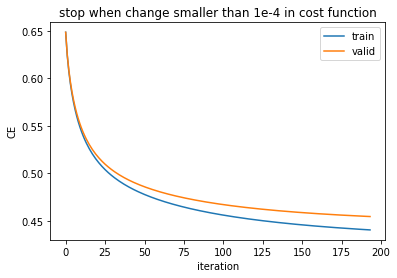

In [ ]:

c3_train=list(c3_train)
c5_train=list(c5_train)
c4_train=list(c4_train)
c6_train=list(c6_train)
plt.clf()
plt.plot(x_axis,c3_train[0],label='train')
plt.plot(x_axis,c4_train[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("stop when change smaller than 1e-4 in cost function")
plt.legend()
plt.show()

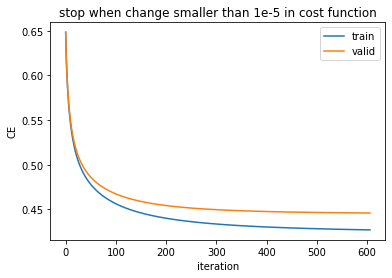

In [ ]:

plt.clf()
plt.plot(x2_axis,c5_train[0],label='train')
plt.plot(x2_axis,c6_train[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("stop when change smaller than 1e-5 in cost function")
plt.legend()
plt.show()

# **Multicalss Regression**

## Data preprocessing and feature selection ##

In [ ]:
categories = ["comp.graphics", "rec.sport.hockey", "sci.med","soc.religion.christian"]
import random
random.seed(551)
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=42)

In [ ]:
print(twenty_train.target_names)
print(twenty_test.target_names)

['comp.graphics', 'rec.sport.hockey', 'sci.med', 'soc.religion.christian']
['comp.graphics', 'rec.sport.hockey', 'sci.med', 'soc.religion.christian']


In [ ]:
print(len(twenty_train.data))
print(len(twenty_test.data))

2377
1582


In [ ]:
len(twenty_train.filenames)

2377

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
news_X_train_counts = count_vect.fit_transform(twenty_train.data)
news_X_train_counts.shape

(2377, 37662)

In [ ]:
#Test set
count_vect_test = CountVectorizer()
news_X_test_counts = count_vect_test.fit_transform(twenty_test.data)
news_X_test_counts.shape

(1582, 32227)

This is the array of words(features)

In [ ]:
count_vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzzz', 'ªl', 'íålittin'], dtype=object)

In [ ]:
count_vect_test.get_feature_names_out()

array(['00', '000', '0000', ..., 'zygon', 'zyxel', 'älvsjö'], dtype=object)

In [ ]:
count_vect.get_feature_names_out().shape

(37662,)

In [ ]:
count_vect.vocabulary_.get(u'algorithm')

In [ ]:
print(news_X_train_counts)

  (0, 15720)	1
  (0, 22573)	1
  (0, 24682)	1
  (0, 24680)	1
  (0, 30888)	1
  (0, 36413)	1
  (0, 20315)	1
  (0, 21334)	1
  (0, 32733)	1
  (0, 28431)	1
  (0, 20869)	2
  (0, 15416)	1
  (0, 11932)	2
  (0, 25231)	1
  (0, 23913)	1
  (0, 35330)	1
  (0, 24910)	1
  (0, 31317)	1
  (0, 24216)	1
  (0, 34125)	1
  (0, 35953)	1
  (0, 26656)	1
  (0, 21366)	1
  (0, 581)	1
  (0, 19454)	2
  :	:
  (2376, 1443)	1
  (2376, 27297)	2
  (2376, 35238)	1
  (2376, 21144)	1
  (2376, 26160)	1
  (2376, 22762)	1
  (2376, 10757)	1
  (2376, 12487)	1
  (2376, 9877)	1
  (2376, 16405)	1
  (2376, 29339)	1
  (2376, 17789)	1
  (2376, 9449)	1
  (2376, 33163)	1
  (2376, 24947)	2
  (2376, 14789)	1
  (2376, 30116)	1
  (2376, 29228)	1
  (2376, 17159)	1
  (2376, 36600)	1
  (2376, 29001)	1
  (2376, 23541)	1
  (2376, 34364)	4
  (2376, 13018)	1
  (2376, 32124)	1


In [ ]:
import pandas as pd
news_x_train = pd.DataFrame.sparse.from_spmatrix(news_X_train_counts)
news_x_train

,0,1,2,3,4,5,6,7,8,9,...,37652,37653,37654,37655,37656,37657,37658,37659,37660,37661
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2374,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
news_x_test = pd.DataFrame.sparse.from_spmatrix(news_X_test_counts)
news_x_test

,0,1,2,3,4,5,6,7,8,9,...,32217,32218,32219,32220,32221,32222,32223,32224,32225,32226
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
news_x_train[301].value_counts()

0    2354
1      14
2       5
3       3
5       1
Name: 301, dtype: int64

In [ ]:
twenty_train.target

array([2, 3, 0, ..., 2, 1, 3])

In [ ]:
news_y_label = list(twenty_train.target)

In [ ]:
#One-hot encoding 0
list_0=[1 if x==0 else 0 for x in news_y_label]
#list_0
#One-hot encoding 1
list_1=[1 if x==1 else 0 for x in news_y_label]
#One-hot encoding 2
list_2=[1 if x==2 else 0 for x in news_y_label]
#One-hot encoding 3
list_3=[1 if x==3 else 0 for x in news_y_label]

In [ ]:
twenty_train.target.shape

(2377,)

In [ ]:
for t in twenty_train.target[:]:
  print(twenty_train.target_names[t])

sci.med
soc.religion.christian
comp.graphics
sci.med
comp.graphics
sci.med
comp.graphics
soc.religion.christian
rec.sport.hockey
comp.graphics
sci.med
comp.graphics
comp.graphics
rec.sport.hockey
soc.religion.christian
soc.religion.christian
sci.med
soc.religion.christian
rec.sport.hockey
rec.sport.hockey
comp.graphics
sci.med
sci.med
sci.med
comp.graphics
soc.religion.christian
rec.sport.hockey
soc.religion.christian
sci.med
soc.religion.christian
rec.sport.hockey
soc.religion.christian
rec.sport.hockey
comp.graphics
soc.religion.christian
sci.med
rec.sport.hockey
soc.religion.christian
sci.med
rec.sport.hockey
soc.religion.christian
sci.med
rec.sport.hockey
soc.religion.christian
sci.med
sci.med
rec.sport.hockey
comp.graphics
soc.religion.christian
sci.med
soc.religion.christian
soc.religion.christian
comp.graphics
comp.graphics
sci.med
rec.sport.hockey
comp.graphics
comp.graphics
soc.religion.christian
sci.med
sci.med
comp.graphics
rec.sport.hockey
comp.graphics
soc.religion.christi

Filter words by occurences

In [ ]:
df_count = news_x_train.astype(bool).sum(axis=0)
df_count

0        120
1         45
2          1
3          2
4          1
        ... 
37657      1
37658      1
37659      1
37660      1
37661      1
Length: 37662, dtype: int64

In [ ]:
new_df = df_count.le(118.5) & df_count.ge(2.37)
new_df.value_counts()

False    24006
True     13656
dtype: int64

In [ ]:
news_sub_x_train =  news_x_train.loc[:,new_df]
news_sub_x_train

,1,5,13,44,65,67,80,82,88,94,...,37625,37629,37631,37632,37634,37637,37639,37649,37652,37655
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
a=list(news_sub_x_train.columns)

In [ ]:
np_x = news_sub_x_train.to_numpy()
np_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np_x.shape

(2377, 13656)

In [ ]:
np_xT=np_x.T
np_xT

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np_xT.shape

(13656, 2377)

Do mutual information and get the highest mutual information feature for each label

In [ ]:
import numpy as np
import sklearn.metrics
def get_mul_info(list_n,np_xT):
  mul_info = np.zeros(13656)
  for i in range(0,13656):
    #the column x
    x= np_xT[i]
    #the column y is list_n
    score = sklearn.metrics.mutual_info_score(x,list_n)
    mul_info[i]=score
  return mul_info

  

In [ ]:
#for label 0 mul_info
mutual_0 = get_mul_info(list_0,np_xT)

In [ ]:
#for label 1,2,3
mutual_1 = get_mul_info(list_1,np_xT)
print(mutual_1.max())
mutual_2 = get_mul_info(list_2,np_xT)
print(mutual_2.max())
mutual_3 = get_mul_info(list_3,np_xT)
print(mutual_2.max())

0.06908433197277122
0.06701280329995586
0.06701280329995586


In [ ]:
def get_top_n(n,mutual_n):
    #top_n_idx is the index in a
    top_n_idx = np.argsort(mutual_n)[-n:]
    c = [a[index] for index in top_n_idx]
    return c

In [ ]:
#get the top 100 feature indx for every class y
top100_0=get_top_n(100,mutual_0)
top100_1=get_top_n(100,mutual_1)
top100_2=get_top_n(100,mutual_2)
top100_3=get_top_n(100,mutual_3)

Merge the list and get the final state

In [ ]:
list_all = top100_0+top100_1+top100_2+top100_3
len(list_all)

400

In [ ]:
#remove depulicate
unique=[i for i in list_all if list_all.count(i)==1]
unique = sorted(unique)

In [ ]:
print(len(unique))

340


In [ ]:
news_x_train_new = news_x_train.iloc[:,unique]
news_x_train_new

,44,107,153,1905,2119,2428,2435,4301,4424,4429,...,36706,36882,36905,36908,36909,36911,37103,37151,37337,37432
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#get the list of words select
list_words = list(count_vect.get_feature_names_out())
select_words = [list_words[i] for i in unique]
print(select_words)

['01', '03', '05', '256', '2d', '3d', '3do', 'abc', 'accept', 'accepting', 'acts', 'advance', 'aisun3', 'albicans', 'alchemy', 'algorithm', 'algorithms', 'allergic', 'amiga', 'anecdotal', 'animation', 'apostles', 'arena', 'argument', 'arrogance', 'assume', 'atheist', 'atheists', 'authority', 'baseball', 'bay', 'beat', 'belief', 'beliefs', 'believed', 'believing', 'biblical', 'bitmap', 'boston', 'brain', 'bruins', 'buffalo', 'byler', 'cadre', 'calgary', 'canadian', 'canadiens', 'cancer', 'candida', 'canucks', 'capitals', 'caps', 'card', 'catholic', 'catholics', 'causes', 'cd', 'champs', 'chastity', 'chem', 'chinese', 'chronic', 'churches', 'clinic', 'clinical', 'cmu', 'cnsvax', 'coach', 'code', 'color', 'colors', 'comp', 'conclusion', 'condition', 'convert', 'coverage', 'cure', 'cview', 'de', 'dead', 'death', 'defensive', 'det', 'devils', 'diagnosed', 'diagnosis', 'die', 'diet', 'directory', 'disciples', 'discussion', 'diseases', 'disorder', 'display', 'doctors', 'doctrine', 'documentat

In [ ]:
#Delete the features that are not common in test and train datasets
test_words = list(count_vect_test.get_feature_names_out())
delete_features=list()
for i in select_words:
  if i not in test_words:
     delete_features.append(unique[select_words.index(i)])
  
for i in delete_features:
  unique.remove(i)

In [ ]:
print(len(unique))

329


In [ ]:
news_x_train_new_1 = news_x_train.iloc[:,unique]
news_x_train_new=news_x_train_new_1

In [ ]:
print(news_x_train_new.shape[1])

329


In [ ]:
#Select the same features for test dataset
#features selected
select_words_test = [list_words[i] for i in unique]
select_words_test
feature_indices=list()

#Find the corresponding indicies
for i in select_words_test:
     feature_indices.append(test_words.index(i))

news_x_test_new = news_x_test.iloc[:,feature_indices]
news_x_test_new=news_x_test_new.to_numpy()
news_x_train_new=news_x_train_new.to_numpy()
news_x_train_new=np.array(news_x_train_new, dtype=np.float128)

In [ ]:
print(news_x_train_new.shape[1])

329


Implement the Multiclass Regression Class

In [ ]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        np.random.seed(551)
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
      y_pred = np.exp(np.matmul(X, self.W))
      return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {i}: {loss_train:.3f}")

        return losses_train, losses_valid
    #Check gradient calculation via small perturbation
    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()

    def check_grad2(self,X,y,lr=0.005,niter=10000):
          ce_all = np.zeros(niter)
          for i in range(niter):
              ce_all[i] =  self.ce(X, y) # cross-entropy
              dw = self.grad(X,y)
              self.W = self.W - lr * dw
 
          plt.clf()
          plt.figure(figsize=((16/9)*3.6,3.6))
          plt.plot(ce_all)
          plt.ylabel("Cross entropy")
          plt.xlabel("iteration")
          plt.title("Check Gradient by Monitoring loss at each iteration")
          plt.show()

In [ ]:
#separate the validation datasets
from sklearn import model_selection
news_x_train, news_x_valid, news_Y_train, news_Y_valid = model_selection.train_test_split(news_x_train_new, twenty_train.target, test_size = 0.5, random_state=1, shuffle=True)
news_x_train=np.array(news_x_train, dtype=np.float128)

In [ ]:
#One-hot-encoding the labels

news_y_train=np.zeros((news_Y_train.shape[0],4))
y_label_train = list(news_Y_train)
list_0_train=[1 if x==0 else 0 for x in y_label_train]
list_1_train=[1 if x==1 else 0 for x in y_label_train]
list_2_train=[1 if x==2 else 0 for x in y_label_train]
list_3_train=[1 if x==3 else 0 for x in y_label_train]
news_y_train[:,0]=list_0_train
news_y_train[:,1]=list_1_train
news_y_train[:,2]=list_2_train
news_y_train[:,3]=list_3_train

news_y_valid=np.zeros((news_Y_valid.shape[0],4))
y_label_valid = list(news_Y_valid)
list_0_valid=[1 if x==0 else 0 for x in y_label_valid]
list_1_valid=[1 if x==1 else 0 for x in y_label_valid]
list_2_valid=[1 if x==2 else 0 for x in y_label_valid]
list_3_valid=[1 if x==3 else 0 for x in y_label_valid]
news_y_valid[:,0]=list_0_valid
news_y_valid[:,1]=list_1_valid
news_y_valid[:,2]=list_2_valid
news_y_valid[:,3]=list_3_valid


news_y_test=np.zeros((1582,4))
y_label_test = list(twenty_test.target)
list_0_test=[1 if x==0 else 0 for x in y_label_test]
list_1_test=[1 if x==1 else 0 for x in y_label_test]
list_2_test=[1 if x==2 else 0 for x in y_label_test]
list_3_test=[1 if x==3 else 0 for x in y_label_test]
news_y_test[:,0]=list_0_test
news_y_test[:,1]=list_1_test
news_y_test[:,2]=list_2_test
news_y_test[:,3]=list_3_test

def one_hot_encoding(y):
  target = np.zeros((y.shape[0],4))
  label = list(y)
  list_0=[1 if x==0 else 0 for x in label]
  list_1=[1 if x==1 else 0 for x in label]
  list_2=[1 if x==2 else 0 for x in label]
  list_3=[1 if x==3 else 0 for x in label]
  target[:,0] = list_0
  target[:,1] = list_1
  target[:,2] = list_2
  target[:,3] = list_3
  return target

In [ ]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

#evaluate the model and get the accuracy
multinomial=Multinomial_logistic(329,4)
ce_train,ce_valid=multinomial.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,niter=1000)
y_pred=multinomial.predict(news_x_test_new)
accu=evaluate(news_y_test,y_pred)
print(accu)

iter 0: 920.162; 951.788
iter 1: 725.340; 762.182
iter 2: 631.433; 666.706
iter 3: 571.245; 607.905
iter 4: 528.784; 570.084
iter 5: 496.266; 543.706
iter 6: 470.538; 523.182
iter 7: 449.518; 504.834
iter 8: 431.802; 489.647
iter 9: 416.600; 476.703
iter 10: 403.365; 465.534
iter 11: 391.701; 455.748
iter 12: 381.317; 447.088
iter 13: 371.989; 439.353
iter 14: 363.545; 432.394
iter 15: 355.847; 426.095
iter 16: 348.787; 420.365
iter 17: 342.277; 415.129
iter 18: 336.247; 410.326
iter 19: 330.636; 405.904
iter 20: 325.395; 401.818
iter 21: 320.484; 398.030
iter 22: 315.866; 394.506
iter 23: 311.512; 391.219
iter 24: 307.397; 388.143
iter 25: 303.497; 385.258
iter 26: 299.794; 382.545
iter 27: 296.270; 379.988
iter 28: 292.911; 377.574
iter 29: 289.703; 375.290
iter 30: 286.635; 373.126
iter 31: 283.695; 371.071
iter 32: 280.876; 369.118
iter 33: 278.167; 367.260
iter 34: 275.562; 365.489
iter 35: 273.054; 363.799
iter 36: 270.636; 362.185
iter 37: 268.303; 360.642
iter 38: 266.049; 359.

In [ ]:
print(news_x_train.shape[1])

340


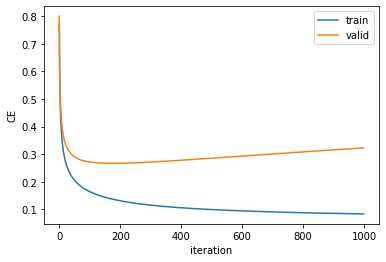

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(ce_train/news_x_train.shape[0],label='train')
plt.plot(ce_valid/news_x_valid.shape[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
plt.show()

Stop before the validation loss starts to increase

In [ ]:
model2 = Multinomial_logistic(329, 4)
optimal_niter = ce_valid.argmin()
print(ce_valid.argmin())
#_, _ = mlr.fit(x_train, y_train, niter=optimal_niter) # retrain the model using best niter
ce_train_iter,ce_valid_iter=model2.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,niter=optimal_niter)
y_pred=model2.predict(news_x_test_new)
optimal_niter_acc=evaluate(news_y_test,y_pred)
print(optimal_niter_acc)

175
iter 0: 920.162; 951.788
iter 1: 725.340; 762.182
iter 2: 631.433; 666.706
iter 3: 571.245; 607.905
iter 4: 528.784; 570.084
iter 5: 496.266; 543.706
iter 6: 470.538; 523.182
iter 7: 449.518; 504.834
iter 8: 431.802; 489.647
iter 9: 416.600; 476.703
iter 10: 403.365; 465.534
iter 11: 391.701; 455.748
iter 12: 381.317; 447.088
iter 13: 371.989; 439.353
iter 14: 363.545; 432.394
iter 15: 355.847; 426.095
iter 16: 348.787; 420.365
iter 17: 342.277; 415.129
iter 18: 336.247; 410.326
iter 19: 330.636; 405.904
iter 20: 325.395; 401.818
iter 21: 320.484; 398.030
iter 22: 315.866; 394.506
iter 23: 311.512; 391.219
iter 24: 307.397; 388.143
iter 25: 303.497; 385.258
iter 26: 299.794; 382.545
iter 27: 296.270; 379.988
iter 28: 292.911; 377.574
iter 29: 289.703; 375.290
iter 30: 286.635; 373.126
iter 31: 283.695; 371.071
iter 32: 280.876; 369.118
iter 33: 278.167; 367.260
iter 34: 275.562; 365.489
iter 35: 273.054; 363.799
iter 36: 270.636; 362.185
iter 37: 268.303; 360.642
iter 38: 266.049; 

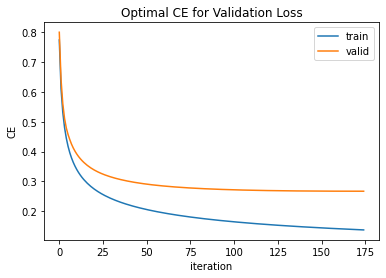

In [ ]:
plt.clf()
plt.plot(ce_train_iter/news_x_train.shape[0],label='train')
plt.plot(ce_valid_iter/news_x_valid.shape[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("Optimal CE for Validation Loss")
plt.legend()
plt.show()

Try different learning rates

In [ ]:
#Large leanring rate
model_lr = Multinomial_logistic(329,4)
ce_lr_train,ce_lr_valid=model_lr.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,lr=0.01,niter=optimal_niter)
y_pred=model_lr.predict(news_x_test_new)
optimal_niter_acc=evaluate(news_y_test,y_pred)
print(optimal_niter_acc)

iter 0: 638.748; 624.373
iter 1: 509.443; 520.434
iter 2: 444.571; 473.091
iter 3: 407.840; 449.853
iter 4: 380.169; 439.248
iter 5: 360.922; 428.028
iter 6: 345.515; 412.454
iter 7: 332.905; 408.764
iter 8: 321.584; 394.920
iter 9: 312.227; 392.248
iter 10: 303.526; 381.779
iter 11: 296.083; 379.280
iter 12: 289.120; 371.641
iter 13: 282.976; 369.223
iter 14: 277.200; 363.675
iter 15: 271.993; 361.301
iter 16: 267.090; 357.232
iter 17: 262.593; 355.029
iter 18: 258.352; 351.899
iter 19: 254.409; 349.918
iter 20: 250.685; 347.407
iter 21: 247.188; 345.638
iter 22: 243.876; 343.571
iter 23: 240.744; 341.992
iter 24: 237.768; 340.262
iter 25: 234.938; 338.849
iter 26: 232.240; 337.381
iter 27: 229.665; 336.118
iter 28: 227.202; 334.858
iter 29: 224.842; 333.730
iter 30: 222.578; 332.635
iter 31: 220.404; 331.630
iter 32: 218.313; 330.669
iter 33: 216.300; 329.775
iter 34: 214.359; 328.926
iter 35: 212.486; 328.130
iter 36: 210.678; 327.377
iter 37: 208.930; 326.668
iter 38: 207.238; 325.

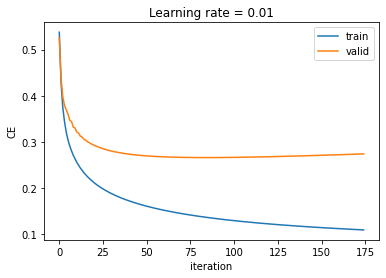

In [ ]:
plt.clf()
plt.plot(ce_lr_train/news_x_train.shape[0],label='train')
plt.plot(ce_lr_valid/news_x_valid.shape[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("Learning rate = 0.01")
plt.legend()
plt.show()

In [ ]:
#Small learning rate
model_lr_small=Multinomial_logistic(329,4)
ce_small_train,ce_small_valid=model_lr_small.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,lr=0.0001,niter=optimal_niter)
y_pred=model_lr_small.predict(news_x_test_new)
small_lr_accu=evaluate(news_y_test,y_pred)

iter 0: 2638.829; 2596.903
iter 1: 2546.735; 2535.451
iter 2: 2456.507; 2475.330
iter 3: 2368.822; 2416.688
iter 4: 2284.850; 2359.881
iter 5: 2211.519; 2304.902
iter 6: 2164.217; 2258.806
iter 7: 2118.362; 2213.919
iter 8: 2073.877; 2170.203
iter 9: 2030.660; 2127.606
iter 10: 1988.618; 2086.077
iter 11: 1947.683; 2045.579
iter 12: 1907.808; 2006.089
iter 13: 1868.961; 1967.585
iter 14: 1831.112; 1930.042
iter 15: 1794.232; 1893.435
iter 16: 1758.291; 1857.734
iter 17: 1723.261; 1822.914
iter 18: 1689.116; 1788.953
iter 19: 1655.843; 1755.838
iter 20: 1623.470; 1723.580
iter 21: 1592.158; 1692.304
iter 22: 1562.323; 1662.476
iter 23: 1534.603; 1635.073
iter 24: 1510.438; 1611.994
iter 25: 1489.155; 1591.235
iter 26: 1468.886; 1571.330
iter 27: 1449.276; 1552.052
iter 28: 1430.226; 1533.338
iter 29: 1411.694; 1515.161
iter 30: 1393.654; 1497.503
iter 31: 1376.092; 1480.354
iter 32: 1359.024; 1463.705
iter 33: 1342.545; 1447.559
iter 34: 1326.872; 1431.940
iter 35: 1312.103; 1416.877
it

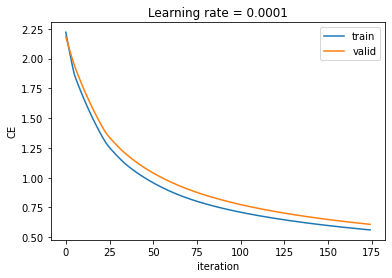

In [ ]:
plt.clf()
plt.plot(ce_small_train/news_x_train.shape[0],label='train')
plt.plot(ce_small_valid/news_x_valid.shape[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.title("Learning rate = 0.0001")
plt.legend()
plt.show()

In [ ]:
from seaborn import heatmap
W_hat = multinomial.W[:-1,:] # remove the intercept
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:]

In [ ]:
#Find the top 5 postive features for class 0
related_features=[]
class_0=W_hat_transformed[:,0]
sorted_class_0 = np.argsort(class_0)
sorted_array_0 = class_0[sorted_class_0]
rslt0 = sorted_array_0[-5 : ]
related_features_indices0=[]
for j in rslt0:
     related_features_indices0.append(np.where(W_hat_transformed == j))

related_features0=[]
for k in range(len(related_features_indices0)):
  index=related_features_indices0[k][0]
  col = news_x_train_new_1.columns[index[0]]
  related_features0.append(list_words[col])

W1=np.zeros((20,4))
f=0
for l in range(len(related_features_indices0)):
  row=related_features_indices0[l][0]
  W1[f,:]=W_hat_transformed[row,:]
  f=f+1


for i in related_features0:
  related_features.append(i)

In [ ]:
#Find the top 5 postive features for class 1
class_1=W_hat_transformed[:,1]
sorted_class_1 = np.argsort(class_1)
sorted_array_1 = class_1[sorted_class_1]
rslt1 = sorted_array_1[-5 : ]
related_features_indices1=[]
for j in rslt1:
     related_features_indices1.append(np.where(W_hat_transformed == j))

related_features1=[]
for k in range(len(related_features_indices1)):
  index=related_features_indices1[k][0]
  col = news_x_train_new_1.columns[index[0]]
  related_features1.append(list_words[col])

for l in range(len(related_features_indices1)):
  row=related_features_indices1[l][0]
  W1[f,:]=W_hat_transformed[row,:]
 
  f=f+1

for i in related_features1:
  related_features.append(i)

In [ ]:
#Find the top 5 postive features for class 2
class_2=W_hat_transformed[:,2]
sorted_class_2 = np.argsort(class_2)
sorted_array_2 = class_2[sorted_class_2]
rslt2 = sorted_array_2[-5 : ]
related_features_indices2=[]
for j in rslt2:
     related_features_indices2.append(np.where(W_hat_transformed == j))
related_features2=[]
for k in range(len(related_features_indices2)):
  index=related_features_indices2[k][0]
  col = news_x_train_new_1.columns[index[0]]
  related_features2.append(list_words[col])

for l in range(len(related_features_indices2)):
  row=related_features_indices2[l][0]

  W1[f,:]=W_hat_transformed[row,:]
  f=f+1  
 
for i in related_features2:
  related_features.append(i)

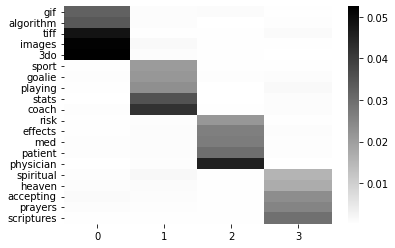

In [ ]:
#Find the top 5 postive features for class 3
class_3=W_hat_transformed[:,3]
sorted_class_3 = np.argsort(class_3)
sorted_array_3 = class_3[sorted_class_3]
rslt3 = sorted_array_3[-5 : ]
related_features_indices3=[]
for j in rslt3:
     related_features_indices3.append(np.where(W_hat_transformed == j))

related_features3=[]
for k in range(len(related_features_indices3)):
  index=related_features_indices3[k][0]
  col = news_x_train_new_1.columns[index[0]]
  related_features3.append(list_words[col])

for l in range(len(related_features_indices3)):
  row=related_features_indices3[l][0]
  W1[f,:]=W_hat_transformed[row,:]
  f=f+1
for i in related_features3:
  related_features.append(i)
W_hat_transformed_df1 = pd.DataFrame(W1, columns=[0,1,2,3], index=related_features)
hmp = heatmap(W_hat_transformed_df1, cmap='gray_r')
fig = hmp.get_figure()

In [ ]:
#Compare with the sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(news_x_train_new, twenty_train.target)
gnb_predictions = gnb.predict(news_x_test_new)
  
# accuracy on X_test
accuracy = gnb.score(news_x_test_new, twenty_test.target)
print(accuracy)

0.8293299620733249


Check the gradient

In [ ]:
# check grad
print(multinomial.check_grad(news_x_train, news_y_train))

2.7402906707528987e-09


<Figure size 432x288 with 0 Axes>

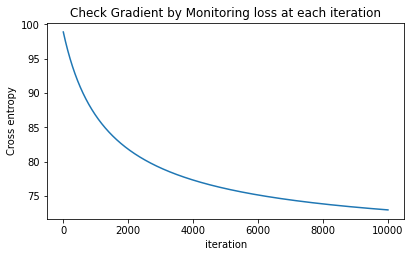

In [ ]:
#Check the gradient by monitoring loss at each iteration
multinomial.check_grad2(news_x_train, news_y_train)

Stop when the gradient is smaller than certain threshold

In [ ]:
class multiclass_logistic_with_check_grad(Multinomial_logistic):
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100,epsilon=5):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        g = np.inf
        for i in range(niter):
          #print(g)
          if np.linalg.norm(g) > epsilon:
            print(np.linalg.norm(g))
            g = self.grad(X, y)
            self.W = self.W - lr * g
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                #print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                z=0
                #print(f"iter {i}: {loss_train:.3f}")
          else:#stop if it is smaller than 10^-2
               losses_train.resize((1,i))
               losses_valid.resize((1,i))
               print(f"Gradient smaller than the threshold at iteration {i}") 
               break    

        return losses_train, losses_valid,i

    def grad(self, X, y):
        return super().grad(X,y)

In [ ]:
mlr_grad = multiclass_logistic_with_check_grad(329,4)
ce_grad_train,ce_grad_valid,stop_lr=mlr_grad.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,niter=100000)
y_pred=mlr_grad.predict(news_x_test_new)
grad_acc=evaluate(news_y_test,y_pred)

inf
970.40631129519911324
220.9974135093480533
146.91702573678915289
114.827482009727170675
95.49172497575899948
83.024667829958057705
73.768848677396386355
66.27949713555612361
60.70179067456090793
56.124063809017807516
52.286746589162978606
49.018204723549783232
46.199163451751995013
43.742940904408980505
41.584084489238762345
39.671703690816545313
37.965482086975606658
36.43311672278510354
35.04852547438508597
33.7905057579501443
32.6417005899611516
31.587795336623567893
30.616893953626041318
29.719034933019518433
28.885815085555695467
28.110095969120087865
27.385773476894211705
26.70759574418201809
26.071018166797813831
25.472087089898406705
24.907345799168786988
24.373757989147469112
23.86864503043203287
23.389634212333771619
22.934615777790138708
22.501707049877661659
22.089222315488959321
21.695647411708473766
21.319618176019804155
20.959902088693332293
20.615382566291762904
20.285045467893173284
19.96796745684999133
19.663305925544740813
19.370290242348219703
19.088214121633013

In [ ]:
x_axis=[]
for i in range(stop_lr):
     x_axis.append(i)
     i=i+1
ce_grad_train=list(ce_grad_train)     
ce_grad_valid=list(ce_grad_valid)

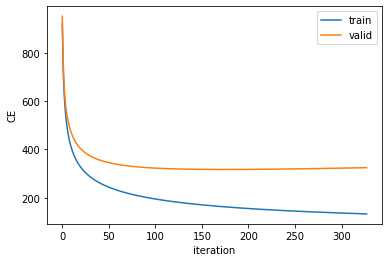

In [ ]:
plt.clf()
plt.plot(x_axis,ce_grad_train[0],label='train')
plt.plot(x_axis,ce_grad_valid[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
plt.show()

Stop if there is small change in cost function

In [ ]:
class multinomial_logistic_with_grad_diff(Multinomial_logistic):
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100,e=1e-1):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
             self.W=self.W - lr * self.grad(X, y)
             loss_train = self.ce(X, y)
             #print(losses_train[i-1]-loss_train)
             if abs(losses_train[i-1]-loss_train)>e:
                 losses_train[i] = loss_train
                 if X_valid is not None and y_valid is not None:
                    loss_valid = self.ce(X_valid, y_valid)
                    losses_valid[i] = loss_valid
                    print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
                 else:
                    print(f"iter {i}: {loss_train:.3f}")
             else:
                  losses_train.resize((1,i))
                  losses_valid.resize((1,i))
                  print(f"Small change in cost function at iteration {i}")
                  break

        return losses_train, losses_valid,i

    def grad(self, X, y):
        return super().grad(X,y)  

In [ ]:
m3=multinomial_logistic_with_grad_diff(329,4)
c3_train,c4_train,stop=m3.fit(news_x_train,news_y_train,news_x_valid,news_y_valid,niter=1000)
y_pred=m3.predict(news_x_test_new)
m3_accu=evaluate(news_y_test,y_pred)
print(m3_accu)

iter 0: 920.162; 951.788
iter 1: 725.340; 762.182
iter 2: 631.433; 666.706
iter 3: 571.245; 607.905
iter 4: 528.784; 570.084
iter 5: 496.266; 543.706
iter 6: 470.538; 523.182
iter 7: 449.518; 504.834
iter 8: 431.802; 489.647
iter 9: 416.600; 476.703
iter 10: 403.365; 465.534
iter 11: 391.701; 455.748
iter 12: 381.317; 447.088
iter 13: 371.989; 439.353
iter 14: 363.545; 432.394
iter 15: 355.847; 426.095
iter 16: 348.787; 420.365
iter 17: 342.277; 415.129
iter 18: 336.247; 410.326
iter 19: 330.636; 405.904
iter 20: 325.395; 401.818
iter 21: 320.484; 398.030
iter 22: 315.866; 394.506
iter 23: 311.512; 391.219
iter 24: 307.397; 388.143
iter 25: 303.497; 385.258
iter 26: 299.794; 382.545
iter 27: 296.270; 379.988
iter 28: 292.911; 377.574
iter 29: 289.703; 375.290
iter 30: 286.635; 373.126
iter 31: 283.695; 371.071
iter 32: 280.876; 369.118
iter 33: 278.167; 367.260
iter 34: 275.562; 365.489
iter 35: 273.054; 363.799
iter 36: 270.636; 362.185
iter 37: 268.303; 360.642
iter 38: 266.049; 359.

In [ ]:
x_axis=[]
for i in range(stop):
     x_axis.append(i)
     i=i+1

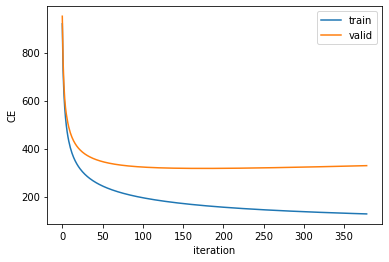

In [ ]:
c3_train=list(c3_train)
c4_train=list(c4_train)
plt.clf()
plt.plot(x_axis,c3_train[0],label='train')
plt.plot(x_axis,c4_train[0],label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
plt.show()

Compare with KNN

best K = 1, test accuracy = 0.7218710493046776


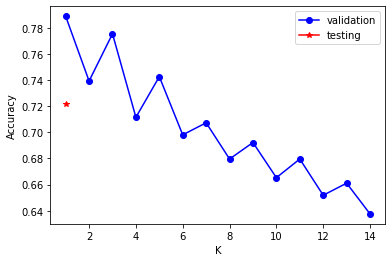

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=1
model_choices=[]
valid_acc=[]
for k in range(1,15):
    knn = KNeighborsClassifier(k)
    knn.fit(news_x_train,news_y_train)
    y_pred=knn.predict(news_x_valid)
    test_accuracy=evaluate(news_y_valid,y_pred)
    model_choices.append(k)
    valid_acc.append(test_accuracy)
    
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNeighborsClassifier(best_valid_K)
y_pred = knn.fit(news_x_train, news_y_train).predict(news_x_test_new)
test_accuracy = evaluate(news_y_test,y_pred)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')  

Compare the accuracy as a function of dataset size

In [ ]:
#randomly select 20%,40%, 60% and 80% of the available training data and train your model on this subset and evaluate the trained model on the test set
size=[0.8,0.6,0.4,0.2]
mult=Multinomial_logistic(329,4)
train_size=[]
test_accu=[]
test_accu_knn=[]
for size in size:
   x_train, x_valid, Y_train, Y_valid = model_selection.train_test_split(news_x_train_new, twenty_train.target, test_size = size, random_state=1, shuffle=True)
   train_size.append(x_train.shape[0])
   y_train=one_hot_encoding(Y_train)
   #y_test=one_hot_encoding(Y_test)
   ce_train,ce_valid=mult.fit(x_train,y_train)
   y_pred=mult.predict(news_x_test_new)
   accu=evaluate(news_y_test,y_pred)
   test_accu.append(accu*100)

   knn = KNeighborsClassifier()
   knn.fit(x_train,y_train)
   y_pred_knn=knn.predict(news_x_test_new)
   test_accuracy=evaluate(news_y_test,y_pred_knn)
   test_accu_knn.append(test_accuracy*100) 


iter 0: 562.359
iter 1: 445.571
iter 2: 387.253
iter 3: 348.002
iter 4: 318.843
iter 5: 296.151
iter 6: 277.891
iter 7: 262.810
iter 8: 250.101
iter 9: 239.218
iter 10: 229.774
iter 11: 221.488
iter 12: 214.148
iter 13: 207.590
iter 14: 201.688
iter 15: 196.340
iter 16: 191.466
iter 17: 187.001
iter 18: 182.890
iter 19: 179.089
iter 20: 175.560
iter 21: 172.274
iter 22: 169.203
iter 23: 166.324
iter 24: 163.619
iter 25: 161.069
iter 26: 158.661
iter 27: 156.382
iter 28: 154.219
iter 29: 152.164
iter 30: 150.208
iter 31: 148.342
iter 32: 146.560
iter 33: 144.855
iter 34: 143.221
iter 35: 141.654
iter 36: 140.149
iter 37: 138.702
iter 38: 137.309
iter 39: 135.966
iter 40: 134.670
iter 41: 133.419
iter 42: 132.210
iter 43: 131.041
iter 44: 129.908
iter 45: 128.811
iter 46: 127.747
iter 47: 126.715
iter 48: 125.713
iter 49: 124.739
iter 50: 123.792
iter 51: 122.870
iter 52: 121.974
iter 53: 121.100
iter 54: 120.249
iter 55: 119.420
iter 56: 118.610
iter 57: 117.820
iter 58: 117.049
iter 59

In [ ]:
train_size.append(news_x_train_new.shape[0])
y_train=one_hot_encoding(twenty_train.target)
ce_train,ce_valid=mult.fit(news_x_train_new,y_train)
y_pred=mult.predict(news_x_test_new)
accu=evaluate(news_y_test,y_pred)
test_accu.append(accu*100)

knn = KNeighborsClassifier()
knn.fit(news_x_train_new,y_train)
y_pred_knn=knn.predict(news_x_test_new)
test_accuracy=evaluate(news_y_test,y_pred_knn)
test_accu_knn.append(test_accuracy*100) 

iter 0: 333.462
iter 1: 331.803
iter 2: 330.206
iter 3: 328.667
iter 4: 327.179
iter 5: 325.739
iter 6: 324.346
iter 7: 322.997
iter 8: 321.692
iter 9: 320.430
iter 10: 319.212
iter 11: 318.037
iter 12: 316.905
iter 13: 315.815
iter 14: 314.767
iter 15: 313.758
iter 16: 312.786
iter 17: 311.850
iter 18: 310.945
iter 19: 310.071
iter 20: 309.224
iter 21: 308.403
iter 22: 307.606
iter 23: 306.830
iter 24: 306.076
iter 25: 305.341
iter 26: 304.625
iter 27: 303.926
iter 28: 303.244
iter 29: 302.577
iter 30: 301.927
iter 31: 301.290
iter 32: 300.668
iter 33: 300.060
iter 34: 299.465
iter 35: 298.882
iter 36: 298.311
iter 37: 297.751
iter 38: 297.203
iter 39: 296.665
iter 40: 296.138
iter 41: 295.620
iter 42: 295.112
iter 43: 294.613
iter 44: 294.122
iter 45: 293.640
iter 46: 293.166
iter 47: 292.699
iter 48: 292.240
iter 49: 291.788
iter 50: 291.342
iter 51: 290.904
iter 52: 290.471
iter 53: 290.045
iter 54: 289.625
iter 55: 289.210
iter 56: 288.801
iter 57: 288.398
iter 58: 287.999
iter 59

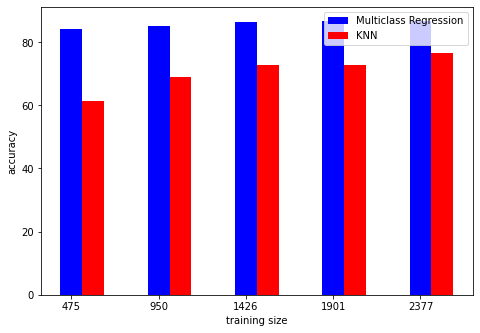

In [ ]:
fig = plt.figure()
X = np.arange(5)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00,test_accu,color = 'b', width = 0.25,label='Multiclass Regression')
ax.bar(X + 0.25,test_accu_knn,color = 'r', width = 0.25, label='KNN')
plt.xticks(X,train_size)
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Compare with Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelBinarizer
y_new  = LabelBinarizer().fit_transform(twenty_train.target)
y_test_new = LabelBinarizer().fit_transform(twenty_test.target)
clf = Ridge()
clf.fit(news_x_train_new, y_new)
y_pred=clf.predict(news_x_test_new)
ridge_accu=evaluate(y_test_new,y_pred)
print(ridge_accu)

0.7566371681415929


Compare with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 100).fit(news_x_train_new, y_new)
dtree_predictions = dtree_model.predict(news_x_test_new)
dt_accu=evaluate(y_test_new,dtree_predictions)
print(dt_accu)

0.7547408343868521
